<a href="https://colab.research.google.com/github/chinmayAmbasht/phys-246-fa23/blob/main/Final_Project_Cosmological_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FINAL PROJECT: Numerical Simulation of the Friedmann Equations

Name: Chinmay Ambasht

Date: 12.14.23

## 0. Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import odeint
from sklearn.linear_model import LinearRegression
from scipy.integrate import solve_ivp
import astropy.cosmology as cosmo
from astropy.constants import c, G
from sklearn.model_selection import train_test_split

##  1. Hubble Value from Riess et al. 2004

In [ ]:
riess_data = pd.read_csv('e9p5b.csv')
riess_data
riess_data.drop(riess_data.columns[5], axis = 1)

,Supernova,z,Distance Modulus,Uncertainty in Distance moduli,Status
0,SN 1990T,0.0400,36.38,0.19,gold
1,SN 1990af,0.0500,36.84,0.21,gold
2,SN 1990O,0.0307,35.90,0.20,gold
3,SN 1991S,0.0560,37.31,0.18,gold
4,SN 1991U,0.0331,35.54,0.20,gold
...,...,...,...,...,...
181,SN 2003dy,1.3400,45.05,0.25,gold
182,SN 2003es,0.9540,44.28,0.31,gold
183,SN 2003eq,0.8390,43.86,0.22,gold
184,SN 2003eb,0.8990,43.64,0.25,gold


Let's analyse the distribution of galaxies as a function of distance moduli and the redshift

Text(0.5, 1.0, 'Distribution of supernovae according to redshift and distance moduli')

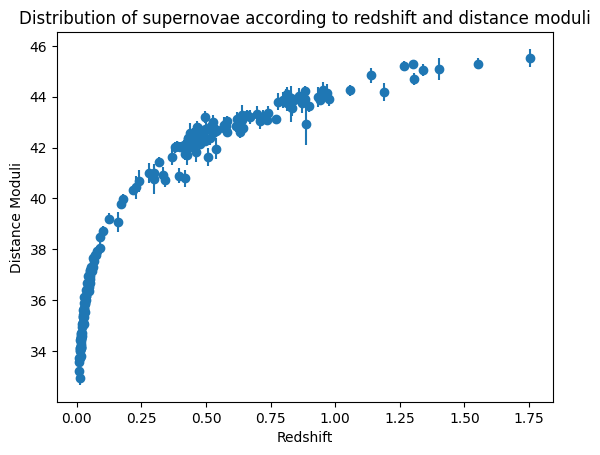

In [ ]:
#sns.scatterplot(x = riess_data['z'],y =  riess_data['Distance Modulus'], data = riess_data)
plt.errorbar(x = riess_data['z'], y= riess_data['Distance Modulus'], yerr = riess_data['Uncertainty in Distance moduli'], fmt = 'o')
plt.xlabel('Redshift')
plt.ylabel('Distance Moduli')
plt.title('Distribution of supernovae according to redshift and distance moduli')

Huh! It looks like there seems to be a logarithmic relation between the two; hence the redshift must be related to distance in some manner.

The relation between distance and distance modulus is given by,
$\mu = 5log(\frac{d}{1 Mpc}) + 25$

In [ ]:
riess_data['Distance'] = 10**((riess_data['Distance Modulus'] - 25) * 0.2)
riess_data['Distance error'] = 10**((riess_data['Uncertainty in Distance moduli'] - 25) * 0.2)

Let's plot the redshift as a function of the distance

Text(0.5, 1.0, 'Redshift v.s distance')

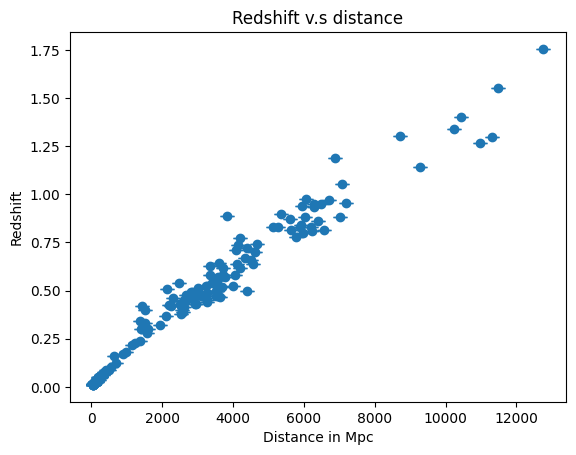

In [ ]:
plt.errorbar(riess_data['Distance'], riess_data['z'], yerr = riess_data['Distance error'], fmt = 'o', capsize = 5)
plt.xlabel('Distance in Mpc')
plt.ylabel('Redshift')
plt.title('Redshift v.s distance')

From relativity (PHYS 225) we know that the redshift is directly related to velocity, hence, it is a good measure of how fast things are moving. Clearly, as things are getting further away from us the more redshifted they seem to be more redshifted and move faster!




Let's try to do a linear regression fit on this curve!

In [ ]:
regr =LinearRegression()
X = np.array(riess_data['Distance']).reshape(-1, 1)
y = np.array(riess_data['z']).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.9754649395325549


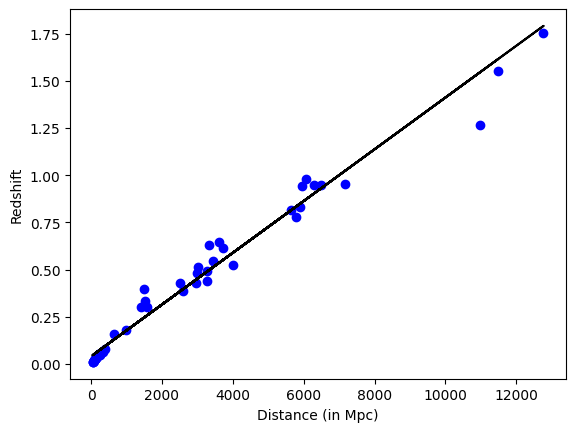

In [ ]:
y_pred = regr.predict(X_test)

plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k', label = 'Predicted')
plt.xlabel('Distance (in Mpc)')
plt.ylabel('Redshift')
plt.show()

Hence, we have proved Hubble's Law!!!

## Friedmann Equations

Here we are trying to simulate the Einstein-Friedmann equations which govern the dynamics of the expanding universe with different parameters.

Here we are concerned with 3 models, $\Lambda CDM$, CDM and Open Universe. These universe models arise out of Einstein's theory of general relativity applied to an isotropic and homogeneous universe.

In [ ]:
params = {
    'Omega_d': 0.7,
    'Omega_m': 0.3
}

In [ ]:
def friedmannEquation(t, y, params):
  a = y
  adot = 2.2 * 10**-18 * np.sqrt((params['Omega_m'] / a**3) + params['Omega_d'] + ((1 - params['Omega_m'] - params['Omega_d']) / a**2))
  return adot

In [ ]:
H0 = 2.2 * 10**-18
t_span = (0, 1 / H0)
initial_scale_factor = 1e-6
params['Omega_d'] = 0.7
params['Omega_m'] = 0.3
sol = solve_ivp(friedmannEquation, t_span, [initial_scale_factor],args = (params,),  method='RK45', t_eval=np.linspace(0, 1/H0, 1000))

In [ ]:
params1 = params
params1['Omega_d'] = 0.
params1['Omega_m'] = 1.
sol1 = solve_ivp(friedmannEquation, t_span, [initial_scale_factor],args = (params1, ), method = 'RK45', t_eval = np.linspace(0, 1/H0, 1000))
t = sol.t / (365.25 * 3600 * 24)
y = sol.y
y1 = sol1.y

In [ ]:
params2 = params
params2['Omega_d'] = 0
params2['Omega_m'] = 0.3
sol2 = solve_ivp(friedmannEquation, t_span, [initial_scale_factor],args = (params2, ), method = 'RK45', t_eval = np.linspace(0, 1/H0, 1000))
t = sol.t / (365.25 * 3600 * 24)
y2 = sol2.y

Text(0, 0.5, 'Expansion rate of the universe')

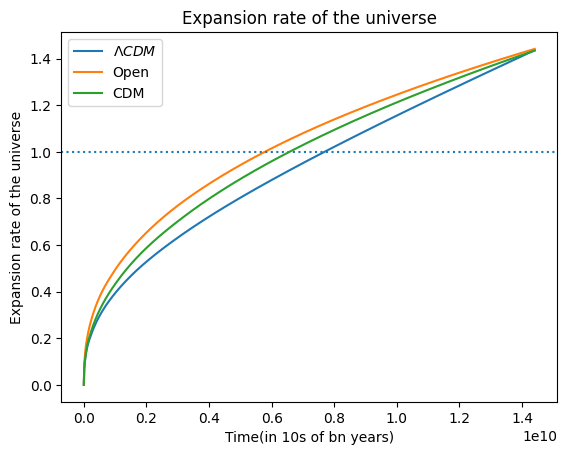

In [ ]:
plt.title('Expansion rate of the universe')
plt.plot(t, y[0], label = r'$\Lambda CDM$')
plt.plot(t, y1[0], label = r'Open')
plt.axhline(1, linestyle = 'dotted')
plt.plot(t, y2[0], label = r'CDM')
plt.legend()
plt.xlabel('Time(in 10s of bn years)')
plt.ylabel('Expansion rate of the universe')